In [1]:
%matplotlib widget
import jungfrau_utils as ju
import numpy as np
import json, h5py
import os, glob
import time
from matplotlib import pyplot as plt

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import *
from alvra_tools.XES_functions import *

import warnings
warnings.filterwarnings('ignore')

In [40]:
pgroup='p20537'
runnumber = 150
print ('run: {:04d}'.format(runnumber))

#############################################################
jsonfile = ''
jsonfile = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, runnumber))[0]
titlestring = str( pgroup + ' --- ' +jsonfile.split('/')[-3])
print (jsonfile)
from sfdata import SFScanInfo
scan = SFScanInfo(jsonfile)
print ('Scan contains {} step(s), scanvar goes {} to {}'.format(len(scan), scan.readbacks[0], scan.readbacks[-1]))

run: 0150
/sf/alvra/data/p20537/raw/run0150-XES_pink_7200eV_2ps/meta/scan.json
Scan contains 21 step(s), scanvar goes 0 to 0


In [38]:
acq = 0
nshots = 100
threshold_low = 3
threshold_high = 15

######################################################################
JFfile = [x for x in scan.files[acq] if "JF02T09V03" in x][0]
print (JFfile)

total_image, total_image_thr, total_for_hist, total_for_hist_thr = \
XES_static_full(JFfile, pgroup, threshold_low, threshold_high, nshots)

/sf/alvra/data/p19737/raw/run0007/data/acq0001.JF02T09V03.h5
Auto-located gain file: /sf/jungfrau/config/gainMaps/JF02T09V03/gains.h5
Auto-located pedestal file: /sf/alvra/data/p19737/raw/JF_pedestals/20220129_170341.JF02T09V03.res.h5
jungfrau file: 18:01 29.01.2022
pedestal file: 17:11 29.01.2022
    mtime difference: 0:49:53.726499
Loaded 100 images
Now summing up 100 images...
It took 4.97 seconds to process this file


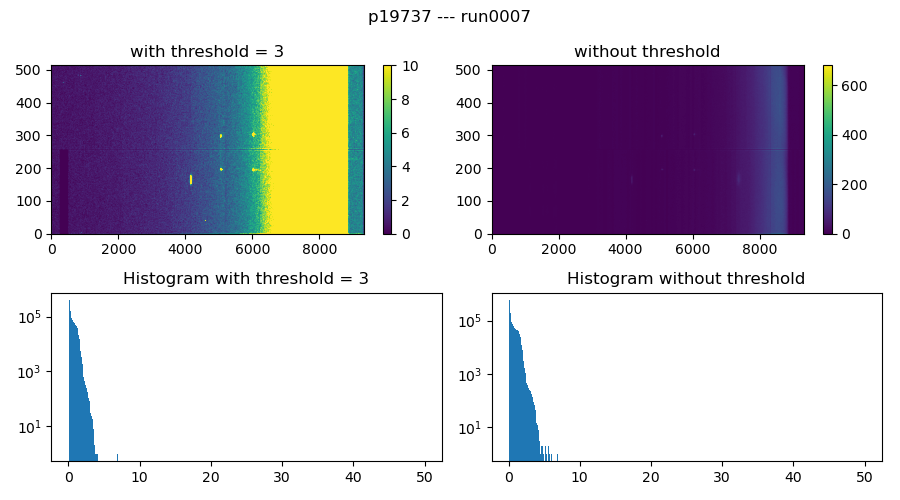

In [39]:
plt.figure(figsize=(9,5))
plt.suptitle(titlestring)
plt.subplots_adjust(wspace=0.5)

plt.subplot(221)
plt.imshow(total_image_thr, origin="lower", aspect='auto', vmin=0, vmax=10)
plt.title("with threshold = {}".format(threshold_low))
plt.colorbar()

plt.subplot(223)
plt.title("Histogram with threshold = {}".format(threshold_low))
plt.hist(total_for_hist_thr.ravel(), bins=np.arange(0.1,50,0.1))
plt.yscale('log')

plt.subplot(222)
plt.imshow(total_image, origin="lower", aspect='auto', vmin=0, vmax=None)
plt.title("without threshold")
plt.colorbar()

plt.subplot(224)
plt.title("Histogram without threshold")
plt.hist(total_for_hist.ravel(), bins=np.arange(0.1,50,0.1))
plt.yscale('log')

plt.tight_layout()
plt.show()

In [3]:
acq = 0
threshold_low = 3
threshold_high = 15

channels_list = []

#####################################################
JFfile = [x for x in scan.files[acqq] if "JF02T09V03" in x][0]
print (JFfile)

import sfdata.sfdatafile
sfdata.sfdatafile.ju = None
scan = SFScanInfo(jsonfile)

spec, _, thr, ROIs, meta = XES_static_ROIs(scan, channels_list, threshold_low, threshold_high, 0)

Processing: run0009-XES_jet_8000eV_pink
Step 1 of 5: filename acq0001

--------------------------------------------------------------------------------

JF02T09V03:ROI_KaDW     1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KaDW_bkg 1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KaUP     1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KaUP_bkg 1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KbDW     1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KbDW_bkg 1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KbUP     1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KbUP_bkg 1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAR-CVME-TIFALL4:EvtSet 1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 1001 / 1001 -> 0% loss
complete channels: 9 / 9 -> 0% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz


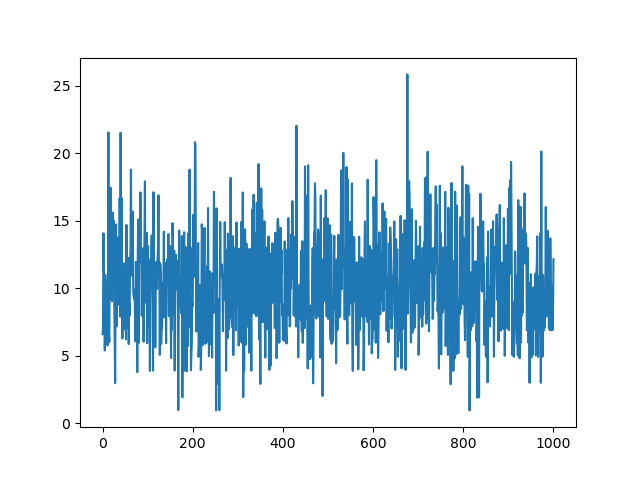

In [5]:
shots = thr['JF02T09V03:ROI_KaDW'].sum(axis=1).sum(axis=1)/6.4
plt.figure()
plt.plot(shots)
plt.show()

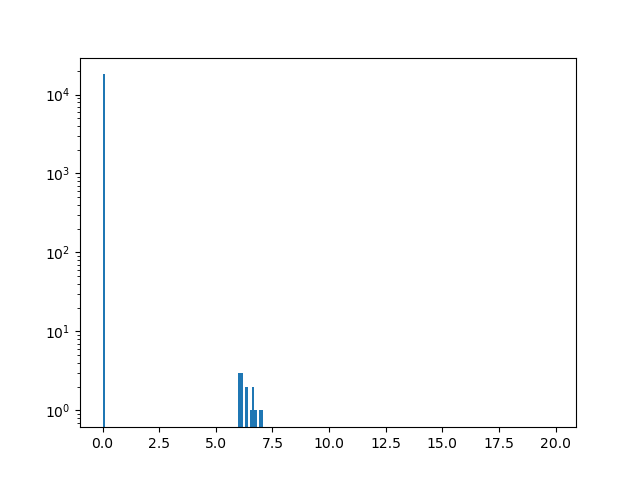

In [6]:
plt.figure()
#plt.hist(np.sum(thr['JF02T09V03:ROI_KaDW'], axis=0).ravel(), bins=np.arange(0,100,0.1))   #cumulative histogram
plt.hist(thr['JF02T09V03:ROI_KaDW'][2].ravel(), bins=np.arange(0,20,0.1))                 #single shot histogram
plt.yscale('log')
plt.show()

## plot averaged ROIs (with threshold)

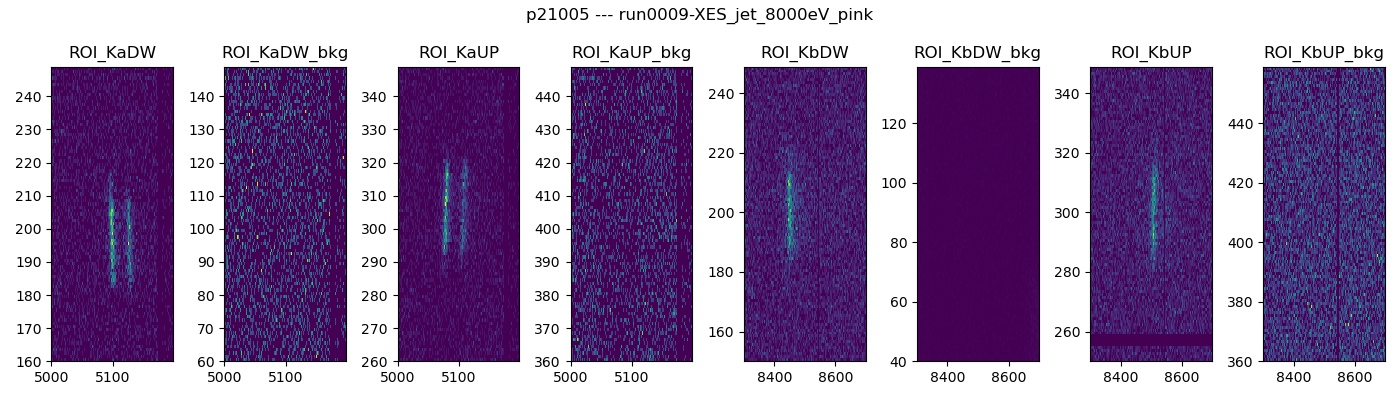

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=len(ROIs), figsize=(14,4))
plt.suptitle(titlestring)
for i, (key, ax) in enumerate(zip(ROIs, axs.flatten())):
    roi2plot = np.average(thr[key], axis = 0)
    xaxis = np.arange(np.array(meta[key+'-roi']).flatten()[-2], np.array(meta[key+'-roi']).flatten()[-1], 1)
    yaxis = np.arange(np.array(meta[key+'-roi']).flatten()[0], np.array(meta[key+'-roi']).flatten()[1], 1)
    plt.sca(ax)
    plt.pcolormesh(xaxis, yaxis, roi2plot, vmax=None)
    plt.title(key.split(':')[-1])
plt.tight_layout()

## plot averaged spectra (with threshold)

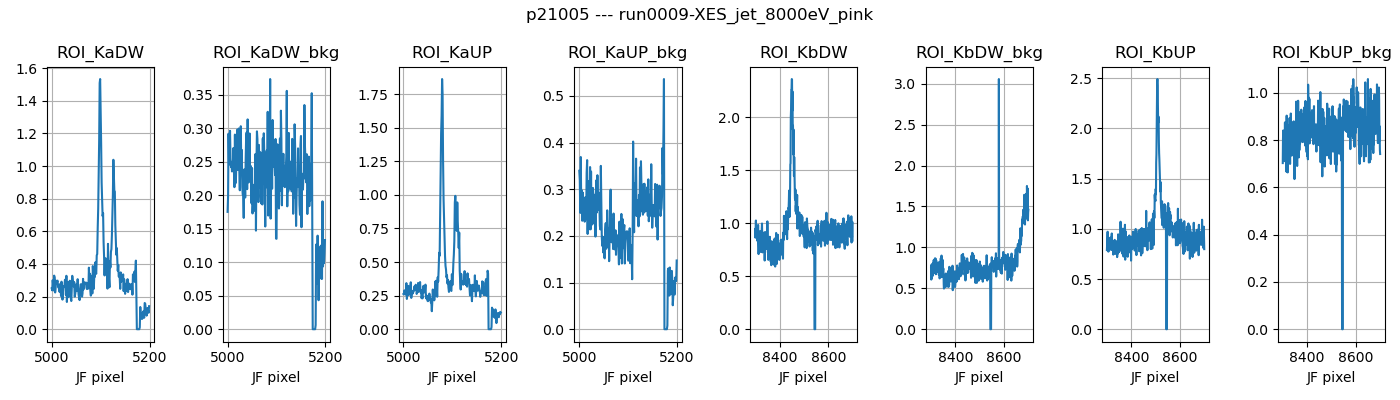

In [8]:
bin_ = 1

fig, axs = plt.subplots(nrows=1, ncols=len(ROIs), figsize=(14,4))
plt.suptitle(titlestring)
for i, (key, ax) in enumerate(zip(ROIs, axs.flatten())):
    spec2plot = spec[key]
    plt.sca(ax)
    xaxis = np.arange(np.array(meta[key+'-roi']).flatten()[-2], np.array(meta[key+'-roi']).flatten()[-1], 1)
    x_axis_rebin, spectrum_rebin, low_err, high_err = plot_tool_static(spec2plot, xaxis, bin_)
    #plt.fill_between(x_axis_rebin, low_err, high_err, color='lightblue')
    plt.plot(x_axis_rebin, spectrum_rebin)
    plt.title(key.split(':')[-1])
    plt.xlabel('JF pixel')
    plt.grid()
plt.tight_layout()

## Average all the acquisitions in the run

In [2]:
pgroup='p21005'
runnumber = 9
print ('run: {:04d}'.format(runnumber))

#############################################################
jsonfile = ''
jsonfile = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, runnumber))[0]
titlestring = str( pgroup + ' --- ' +jsonfile.split('/')[-3])
print (jsonfile)

from sfdata import SFScanInfo
scan = SFScanInfo(jsonfile)
if scan.parameters['scan_name'] != 'dummy':
    if scan.parameters['units'] == ['fs']:
        Timezero_mm = get_timezero_NBS(jsonfile)
        scanvar = scan.readbacks - mm2fs(Timezero_mm, 0)
    else: 
        scanvar = scan.readbacks
    print ('Scan contains {} step(s), scanvar goes from {:.2f} to {:.2f} {}'.format(len(scan), scanvar[0], scanvar[-1], scan.parameters['units'][0]))
else:
    print ('No motors moved')

run: 0009
/sf/alvra/data/p21005/raw/run0009-XES_jet_8000eV_pink/meta/scan.json
No motors moved


In [3]:
threshold_low = 5
threshold_high = 20

channels_list = []

#####################################################
import sfdata.sfdatafile
sfdata.sfdatafile.ju = None
scan = SFScanInfo(jsonfile)

spectra = []

for indexfile in range(len(scan)):
    
    spec, _, _, ROIs, meta = XES_static_ROIs(scan, channels_list, threshold_low, threshold_high, indexfile)
    
    spectra.append(spec)

Processing: run0009-XES_jet_8000eV_pink
Step 5 of 5: filename acq0005

--------------------------------------------------------------------------------

JF02T09V03:ROI_KaDW     1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KaDW_bkg 1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KaUP     1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KaUP_bkg 1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KbDW     1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KbDW_bkg 1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KbUP     1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
JF02T09V03:ROI_KbUP_bkg 1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAR-CVME-TIFALL4:EvtSet 1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 1001 / 1001 -> 0% loss
complete channels: 9 / 9 -> 0% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz


In [11]:
s = {}
for key in ROIs:
    sp = []
    for i in range(len(spectra)):
        sp.append(spectra[i][key])
    sp = np.array(np.average(sp, axis=0))
    s[key] = sp

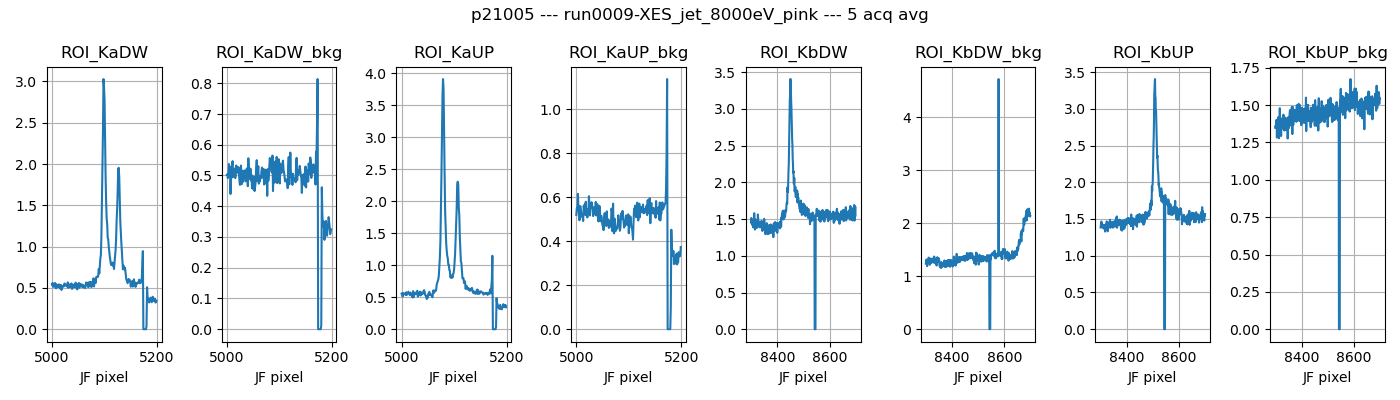

In [12]:
bin_ = 1

fig, axs = plt.subplots(nrows=1, ncols=len(ROIs), figsize=(14,4))
plt.suptitle(titlestring+' --- {} acq avg'.format(len(spectra)))

for i, (key, ax) in enumerate(zip(ROIs, axs.flatten())):
    spec2plot = s[key]
    plt.sca(ax)
    xaxis = np.arange(np.array(meta[key+'-roi']).flatten()[-2], np.array(meta[key+'-roi']).flatten()[-1], 1)
    x_axis_rebin, spectrum_rebin, low_err, high_err = plot_tool_static(spec2plot, xaxis, bin_)
    plt.plot(x_axis_rebin, spectrum_rebin)
    #plt.ylim(0,0.2)
    #plt.xlim(3050,3250)
    #plt.xlim(1250,1450)
    
    plt.title(key.split(':')[-1])
    plt.xlabel('JF pixel')
    plt.grid()
plt.tight_layout()

## Now with Energy calibration 

In [27]:
m_all = np.loadtxt('/das/work/p19/p19262/JF_XES_calibration/223_XAS_CpRhCO2_250fs.json_m_all.txt')
b_all = np.loadtxt('/das/work/p19/p19262/JF_XES_calibration/223_XAS_CpRhCO2_250fs.json_b_all.txt')

<IPython.core.display.Javascript object>


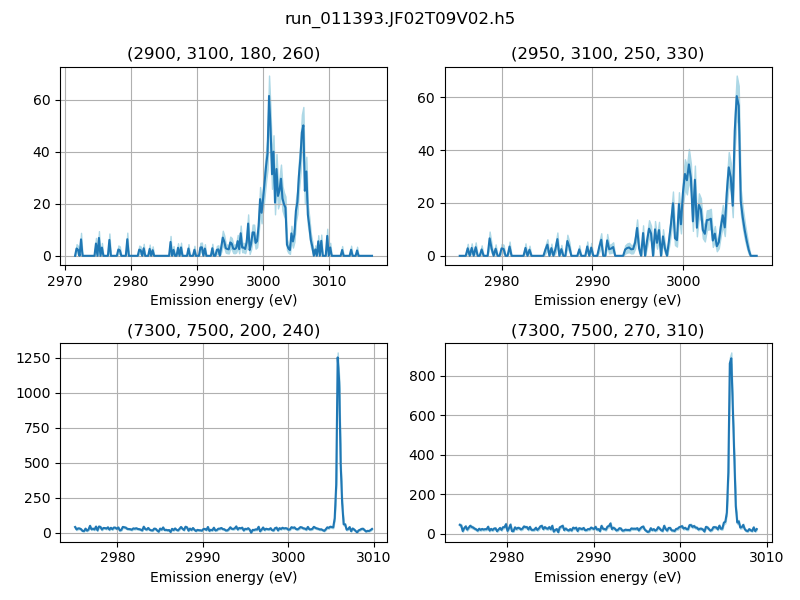

In [28]:
fig = plt.figure(figsize=(8, 6))
plt.suptitle(fc.selected_filename)

binarray = [1,1,1,1] # change the bin size if wanted, 1 is every pixel
spectrumarray = [spectrum_roi1, spectrum_roi2, spectrum_roi3, spectrum_roi4]
roiarray = [roi1, roi2, roi3, roi4]

for i in range(4):
    x_axis = np.linspace(roiarray[i][0]*m_all[i]+b_all[i], roiarray[i][1]*m_all[i]+b_all[i], roiarray[i][1]-roiarray[i][0])
    
    x_axis_rebin, spectrum_rebin, low_err, high_err = plot_tool_static(spectrumarray[i], x_axis, binarray[i])
    location = 221+i  # this is to index the position of the subplot
    ax = plt.subplot(location)
    ax.plot(x_axis_rebin,spectrum_rebin)
    ax.fill_between(x_axis_rebin, low_err, high_err, color='lightblue')
    plt.grid()
    plt.xlabel('Emission energy (eV)')

    ax.set_title(str(roiarray[i]))
plt.tight_layout()

## Next cells for a summing up identical file, ONLY JF file!

In [35]:
datalist = []
for file in glob('/sf/alvra/data/p19262/raw/static_data/RIXS_CpRhCO2_250fs_3002p8eV_newCRY1/*JF*'):
    datalist.append(file)
datalist = sorted(datalist)#, key = os.path.getmtime)
patch = datalist[:4]
print (len(patch))
patch

4


['/sf/alvra/data/p19262/raw/static_data/RIXS_CpRhCO2_250fs_3002p8eV_newCRY1/run_011417.JF02T09V02.h5',
 '/sf/alvra/data/p19262/raw/static_data/RIXS_CpRhCO2_250fs_3002p8eV_newCRY1/run_011418.JF02T09V02.h5',
 '/sf/alvra/data/p19262/raw/static_data/RIXS_CpRhCO2_250fs_3002p8eV_newCRY1/run_011419.JF02T09V02.h5',
 '/sf/alvra/data/p19262/raw/static_data/RIXS_CpRhCO2_250fs_3002p8eV_newCRY1/run_011420.JF02T09V02.h5']

In [36]:
roi1 = (2900, 3100, 180, 240) #signal CRY2 low
roi2 = (2950, 3100, 260, 320) #signal CRY2 up

roi3 = (7300, 7500, 200, 240) #signal CRY1 low
roi4 = (7300, 7500, 270, 310) #signal CRY1 up

threshold_low = 2
threshold_high = 10
nshots = None

######################################################################################
from alvra_tools import clock
clock_int = clock.Clock()

spectrum_roi1_all = []
spectrum_roi2_all = []
spectrum_roi3_all = []
spectrum_roi4_all = []

for JF_single_file in patch:
    
    spectrum_roi1, spectrum_roi2, spectrum_roi3, spectrum_roi4, pids = \
    XES_static_4ROIs(JF_single_file, pgroup, roi1, roi2, roi3, roi4, threshold_low, threshold_high, nshots)
    
    spectrum_roi1_all.append(spectrum_roi1)
    spectrum_roi2_all.append(spectrum_roi2)
    spectrum_roi3_all.append(spectrum_roi3)
    spectrum_roi4_all.append(spectrum_roi4)
    
    clear_output(wait=True)
    print ("It took", clock_int.tick(), "seconds to process this file")

spectrum_roi1_all = np.asarray(spectrum_roi1_all)
spectrum_roi2_all = np.asarray(spectrum_roi2_all)
spectrum_roi3_all = np.asarray(spectrum_roi3_all)
spectrum_roi4_all = np.asarray(spectrum_roi4_all)

print ("It took {} seconds to process {} files".format(clock_int.tock(), len(patch)))

It took 23.5 seconds to process this file
It took 111.0 seconds to process 4 files


<IPython.core.display.Javascript object>


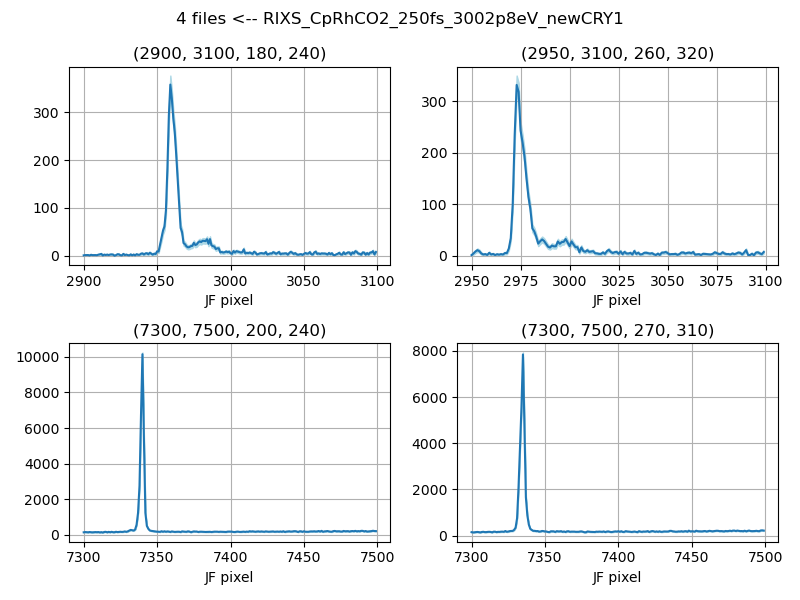

In [40]:
fig = plt.figure(figsize=(8, 6))
plt.suptitle('{} files <-- {}'.format(len(patch),patch[0].split('/')[-2]))

spectrum_roi1 = np.mean(spectrum_roi1_all, axis = 0)
spectrum_roi2 = np.mean(spectrum_roi2_all, axis = 0)
spectrum_roi3 = np.mean(spectrum_roi3_all, axis = 0)
spectrum_roi4 = np.mean(spectrum_roi4_all, axis = 0)

binarray = [1,1,1,1] # change the bin size if wanted, 1 is every pixel
spectrumarray = [spectrum_roi1, spectrum_roi2, spectrum_roi3, spectrum_roi4]
roiarray = [roi1, roi2, roi3, roi4]

for i in range(4):
    x_axis = np.arange(roiarray[i][0], roiarray[i][1])
    x_axis_rebin, spectrum_rebin, low_err, high_err = plot_tool_static(spectrumarray[i], x_axis, binarray[i])
    location = 221+i  # this is to index the position of the subplot
    ax = plt.subplot(location)
    ax.plot(x_axis_rebin,spectrum_rebin)
    ax.fill_between(x_axis_rebin, low_err, high_err, color='lightblue')
    plt.grid()
    plt.xlabel('JF pixel')

    ax.set_title(str(roiarray[i]))
plt.tight_layout()

## Now with Energy calibration 

In [41]:
m_all = np.loadtxt('/das/work/p19/p19262/JF_XES_calibration/223_XAS_CpRhCO2_250fs.json_m_all.txt')
b_all = np.loadtxt('/das/work/p19/p19262/JF_XES_calibration/223_XAS_CpRhCO2_250fs.json_b_all.txt')

<IPython.core.display.Javascript object>


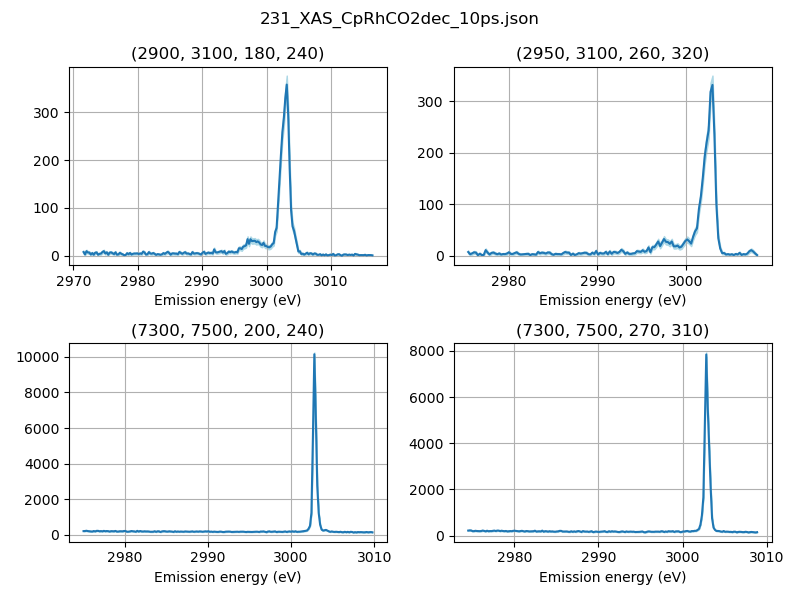

In [42]:
fig = plt.figure(figsize=(8, 6))
plt.suptitle(fc.selected_filename)

binarray = [1,1,1,1] # change the bin size if wanted, 1 is every pixel
spectrumarray = [spectrum_roi1, spectrum_roi2, spectrum_roi3, spectrum_roi4]
roiarray = [roi1, roi2, roi3, roi4]

for i in range(4):
    x_axis = np.linspace(roiarray[i][0]*m_all[i]+b_all[i], roiarray[i][1]*m_all[i]+b_all[i], roiarray[i][1]-roiarray[i][0])
    
    x_axis_rebin, spectrum_rebin, low_err, high_err = plot_tool_static(spectrumarray[i], x_axis, binarray[i])
    location = 221+i  # this is to index the position of the subplot
    ax = plt.subplot(location)
    ax.plot(x_axis_rebin,spectrum_rebin)
    ax.fill_between(x_axis_rebin, low_err, high_err, color='lightblue')
    plt.grid()
    plt.xlabel('Emission energy (eV)')

    ax.set_title(str(roiarray[i]))
plt.tight_layout()

In [44]:
def interpstuff(RIXS_2D, xaxis, energy):
    indexinter = np.arange(np.shape(RIXS_2D)[0])
    interp_axis = np.arange((xaxis - energy[-1])[-1], (xaxis - energy[0])[0], xaxis[0]-xaxis[1])

    RIXS_roi1_interp = []

    for index in indexinter:
        RIXS_roi1_interp.append(np.interp(interp_axis, -(xaxis - energy[index]), np.array(RIXS_2D)[index,:]))
        
    return (interp_axis, RIXS_roi1_interp)

In [53]:
indexinter = np.arange(np.shape(RIXS_roi1)[0])
interp_axis1 = np.arange((xaxis1 - Energy_eV[-1])[-1], (xaxis1 - Energy_eV[0])[0], xaxis1[0]-xaxis1[1])

RIXS_roi1_interp = []

for index in indexinter:
    RIXS_roi1_interp.append(np.interp(interp_axis, -(xaxis1 - Energy_eV[index]), np.array(RIXS_roi1)[index,:]))

In [54]:
interp_axis1, RIXS_map_interp1 = interpstuff(RIXS_roi1, xaxis1, Energy_eV)
interp_axis2, RIXS_map_interp2 = interpstuff(RIXS_roi2, xaxis2, Energy_eV)
interp_axis3, RIXS_map_interp3 = interpstuff(RIXS_roi3, xaxis3, Energy_eV)
interp_axis4, RIXS_map_interp4 = interpstuff(RIXS_roi4, xaxis4, Energy_eV)

<IPython.core.display.Javascript object>


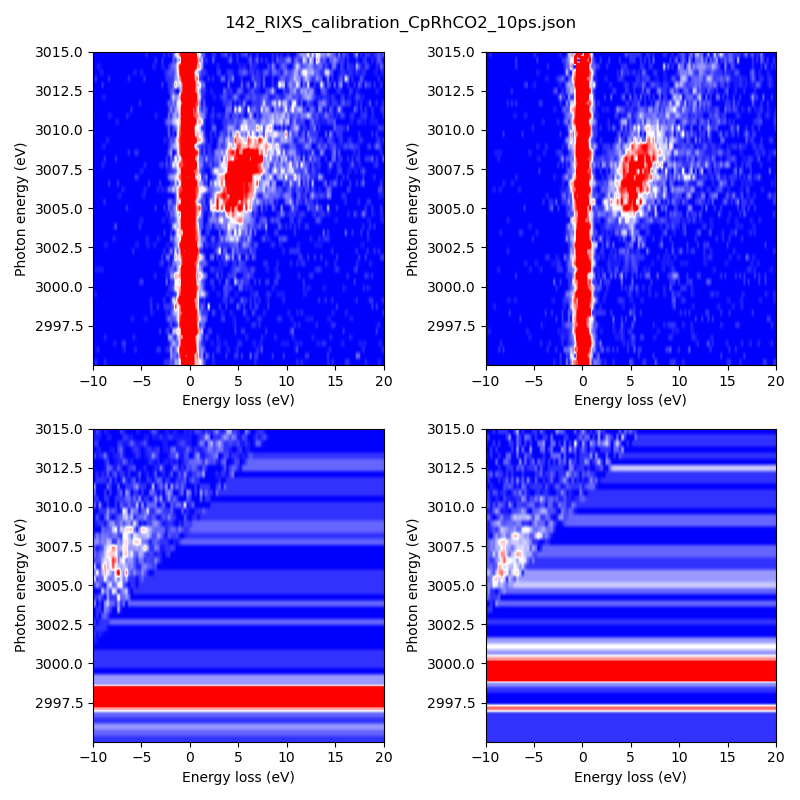

In [55]:
plt.figure(figsize=(8,8))
plt.suptitle(fc.selected_filename, fontsize=12)

plt.subplot(221)
plt.imshow(RIXS_roi1_interp, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[interp_axis1[0], interp_axis1[-1], Energy_eV[0], Energy_eV[-1]], vmin=0, vmax=10)
plt.xlim(-10,20)
plt.xlabel('Energy loss (eV)')
plt.ylabel('Photon energy (eV)')
plt.show()

plt.subplot(222)
plt.imshow(RIXS_roi2_interp, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[interp_axis2[0], interp_axis2[-1], Energy_eV[0], Energy_eV[-1]], vmin=0, vmax=10)
plt.xlim(-10,20)
plt.xlabel('Energy loss (eV)')
plt.ylabel('Photon energy (eV)')
plt.show()

plt.subplot(223)
plt.imshow(RIXS_roi3_interp, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[interp_axis3[0], interp_axis3[-1], Energy_eV[0], Energy_eV[-1]], vmin=0, vmax=10)
plt.xlim(-10,20)
plt.xlabel('Energy loss (eV)')
plt.ylabel('Photon energy (eV)')
plt.show()

plt.subplot(224)
plt.imshow(RIXS_roi4_interp, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[interp_axis4[0], interp_axis4[-1], Energy_eV[0], Energy_eV[-1]], vmin=0, vmax=10)
plt.xlim(-10,20)
plt.xlabel('Energy loss (eV)')
plt.ylabel('Photon energy (eV)')
plt.show()

plt.tight_layout()
#plt.savefig(savedir+'/RIXS_Eloss_Si111_lower_Rhacac.png')

In [716]:
indexlist = np.arange(65,100,1)
Energy_eV[indexlist]

array([3022.50562809, 3023.00466412, 3023.50410547, 3024.00398235,
       3024.50351926, 3025.00396952, 3025.50452772, 3026.00483524,
       3026.50495134, 3027.00430731, 3027.50436819, 3028.00537426,
       3028.50484071, 3029.00282522, 3029.50259317, 3030.00378693,
       3030.50301768, 3031.00502553, 3031.50524917, 3032.00434702,
       3032.5056239 , 3033.00415063, 3033.50524863, 3034.00260018,
       3034.50252391, 3035.00571605, 3035.50473607, 3036.00295544,
       3036.50447576, 3037.00483444, 3037.50230861, 3038.00589641,
       3038.50554188, 3039.00347699, 3039.50447868])

<IPython.core.display.Javascript object>


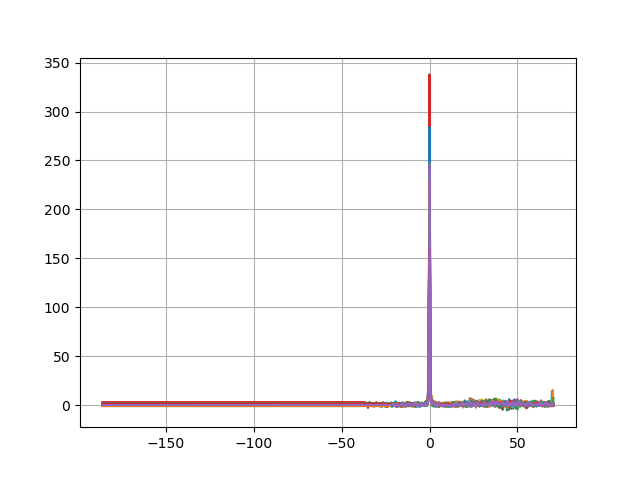

In [717]:
common_axis = np.arange((xaxis3 - Energy_eV[100])[-1], (xaxis3 - Energy_eV[0])[0], xaxis3[0]-xaxis3[1])

total_roi3 = 0
plt.figure()
for index in indexlist:
    #plt.plot(xaxis3 - Energy_eV[0],np.array(RIXS_roi3)[0,:], label = 'E={}'.format(np.round(Energy_eV[0],1)))
    total_roi3 +=  np.interp(common_axis, -(xaxis3 - Energy_eV[index]), np.array(RIXS_roi3)[index,:])
    plt.plot(common_axis, np.interp(common_axis, -(xaxis3 - Energy_eV[index]), np.array(RIXS_roi3)[index,:]))
plt.grid()
plt.show()

/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


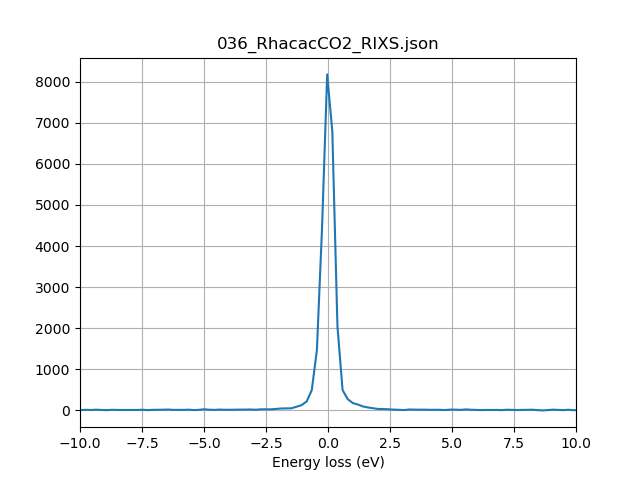

In [719]:
plt.figure()
plt.title(fc.selected_filename)
plt.plot(common_axis, total_roi3)

plt.grid()

plt.xlim(-10,10)
#plt.ylim(0,700)
plt.xlabel('Energy loss (eV)')

plt.show()

plt.savefig(savedir+'/elastic_Si111_lower_Rhacac.png')

In [496]:
indexlist = np.arange(45,56,1)
indexlist

/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55])

/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


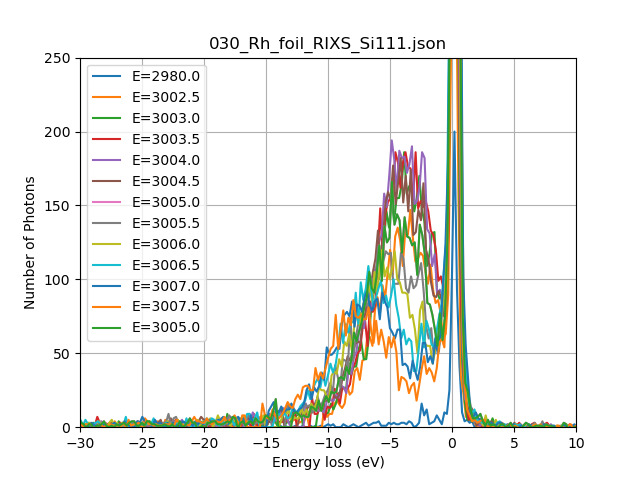

In [499]:
plt.figure()
plt.title(fc.selected_filename)
plt.plot(xaxis3 - Energy_eV[0], np.array(RIXS_roi3)[0,:], label = 'E={}'.format(np.round(Energy_eV[0],1)))
for index in indexlist:
    #offset += 20
    plt.plot(xaxis3 - Energy_eV[index], np.array(RIXS_roi3)[index,:], label = 'E={}'.format(np.round(Energy_eV[index],1)))

plt.plot(xaxis3 - Energy_eV[50], np.array(RIXS_roi3)[50,:], label = 'E={}'.format(np.round(Energy_eV[50],1)))
plt.xlim(-30,10)
plt.legend(loc='best')
plt.xlabel('Energy loss (eV)')
plt.ylabel('Number of Photons')
plt.ylim(0,250)
plt.grid()
plt.show()

plt.savefig(savedir+'/resonances_Si111.png')

In [250]:
from scipy.optimize import curve_fit

class Fit:
    
    def __init__(self, func, estim, p0=None):
        self.func = func
        self.estim = estim
        self.p0 = self.popt = p0
        self.pcov = None
   
    def estimate(self, x, y):
        self.p0 = self.popt = self.estim(x,y)

    def fit(self, x, y):
        self.popt, self.pcov = curve_fit(self.func, x, y, p0=self.p0)
    
    def eval(self, x):
        return self.func(x, *self.popt)

In [262]:
fit.popt

/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([-0.79537398, 20.4592576 ,  2.54319107,  0.67786012])

/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


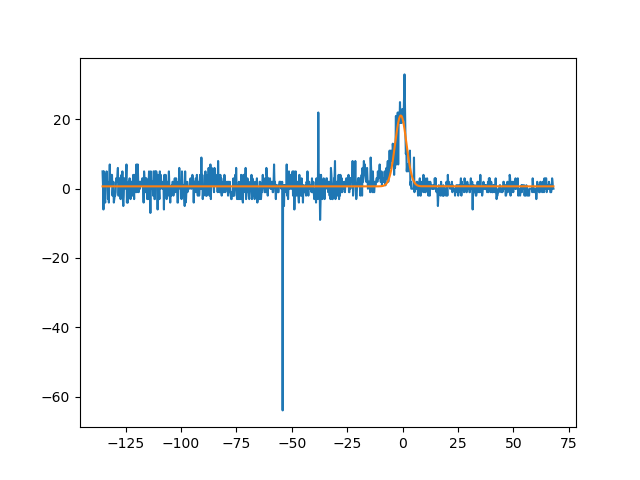

width = 6.485088970572784


In [268]:


fit = Fit(gaussian, estimate_gaussian_parameters)
fit.estimate(xaxis3 - Energy_eV[0], np.array(RIXS_roi3)[0,:])
fit.p0 = better_p0(fit.p0, 0, 0)

fit.fit(xaxis3 - Energy_eV[0],np.array(RIXS_roi3)[0,:])


plt.figure()
plt.plot(xaxis3 - Energy_eV[0], np.array(RIXS_roi3)[0,:], label = 'E={}'.format(np.round(Energy_eV[0],1)))
plt.plot(xaxis3 - Energy_eV[0], fit.eval(xaxis3 - Energy_eV[0]), label = 'E={}'.format(np.round(Energy_eV[0],1)))

plt.show()
print('width = {}'.format(np.abs(fit.popt[2]*2.55)))

In [89]:
datalist = []
for file in glob('/sf/alvra/data/p19262/raw/scan_data/027_Rh_foil*'):
    datalist.append(file)
datalist = sorted(datalist)#, key = os.path.getmtime)
patch = datalist[:-1]
patch

/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['/sf/alvra/data/p19262/raw/scan_data/027_Rh_foil_RIXS_001',
 '/sf/alvra/data/p19262/raw/scan_data/027_Rh_foil_RIXS_002',
 '/sf/alvra/data/p19262/raw/scan_data/027_Rh_foil_RIXS_003',
 '/sf/alvra/data/p19262/raw/scan_data/027_Rh_foil_RIXS_004',
 '/sf/alvra/data/p19262/raw/scan_data/027_Rh_foil_RIXS_005',
 '/sf/alvra/data/p19262/raw/scan_data/027_Rh_foil_RIXS_006',
 '/sf/alvra/data/p19262/raw/scan_data/027_Rh_foil_RIXS_007',
 '/sf/alvra/data/p19262/raw/scan_data/027_Rh_foil_RIXS_008',
 '/sf/alvra/data/p19262/raw/scan_data/027_Rh_foil_RIXS_009',
 '/sf/alvra/data/p19262/raw/scan_data/027_Rh_foil_RIXS_010',
 '/sf/alvra/data/p19262/raw/scan_data/027_Rh_foil_RIXS_011']

In [94]:
roi1 = (2600, 3600, 200, 260) #signal 1
roi2 = (2600, 3600, 100, 160) #bkg 1

roi3 = (5900, 6900, 200, 260) #signal 2
roi4 = (5900, 6900, 100, 160) #bkg 2

threshold_low = 2.0
threshold_high = 10

channel_list = ['JF02T09V02']

######################################################################################
from sfdata import SFScanInfo

RIXS_roi1_all = []
XAS_roi1_all = []
RIXS_roi3_all = []
XAS_roi3_all = []

for json_file in patch:

    scan = SFScanInfo(fc.selected)
    Energy_eV = scan.readbacks

    XAS_roi1 = []
    XAS_roi3 = []
    calibration = []
    RIXS_roi1 = []
    RIXS_roi3 = []

    for i, step in enumerate(scan.files):

        fn = step[3]
        print (json_file.split('/')[-1])
        print ("File {} out of {}: Processing {}".format(i+1, len(scan.files), fn.split('/')[-1]))

        spectrum_roi1 = 0
        spectrum_roi2 = 0
        spectrum_roi3 = 0
        spectrum_roi4 = 0

        nshots = None

        images_roi1, images_roi2, images_roi3, images_roi4, pids = \
        load_crop_JF_batches(fn, roi1, roi2, roi3, roi4, nshots=nshots)

        images_roi1_thr = images_roi1.copy()
        images_roi1_thr[images_roi1 < threshold_low] = 0
        images_roi1_thr[images_roi1 > threshold_high] = 0

        images_roi2_thr = images_roi2.copy()
        images_roi2_thr[images_roi2 < threshold_low] = 0
        images_roi2_thr[images_roi2 > threshold_high] = 0

        images_roi3_thr = images_roi3.copy()
        images_roi3_thr[images_roi3 < threshold_low] = 0
        images_roi3_thr[images_roi3 > threshold_high] = 0

        images_roi4_thr = images_roi4.copy()
        images_roi4_thr[images_roi4 < threshold_low] = 0
        images_roi4_thr[images_roi4 > threshold_high] = 0


        spectrum_roi1  = images_roi1_thr.sum(axis = 1).sum(axis = 0)
        spectrum_roi2  = images_roi2_thr.sum(axis = 1).sum(axis = 0)
        spectrum_roi3  = images_roi3_thr.sum(axis = 1).sum(axis = 0)
        spectrum_roi4  = images_roi4_thr.sum(axis = 1).sum(axis = 0)

        XAS_roi1.append(np.abs((spectrum_roi1 - spectrum_roi2).sum()))
        XAS_roi3.append(np.abs((spectrum_roi3 - spectrum_roi4).sum()))
        #print (np.argmax(spectrum_roi3 - spectrum_roi4))
        calibration.append(np.argmax(spectrum_roi1 - spectrum_roi2))

        RIXS_roi1.append(spectrum_roi1 - spectrum_roi2)
        RIXS_roi3.append(spectrum_roi3 - spectrum_roi4)
        clear_output(wait=True)
        print ("It took", clock.tick(), "seconds to process this file")

    RIXS_roi1_all.append(RIXS_roi1)
    XAS_roi1_all.append(XAS_roi1)
    
    RIXS_roi3_all.append(RIXS_roi3)
    XAS_roi3_all.append(XAS_roi3)
    
    print ("\nJob done! It took", clock.tock(), "seconds to process", len(scan.files), "file(s)")

RIXS_roi1_all = np.asarray(RIXS_roi1_all)
XAS_roi1_all = np.asarray(XAS_roi1_all)
RIXS_roi3_all = np.asarray(RIXS_roi3_all)
XAS_roi3_all = np.asarray(XAS_roi3_all)



It took 7.5 seconds to process this file

Job done! It took 21877.1 seconds to process 101 file(s)


/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


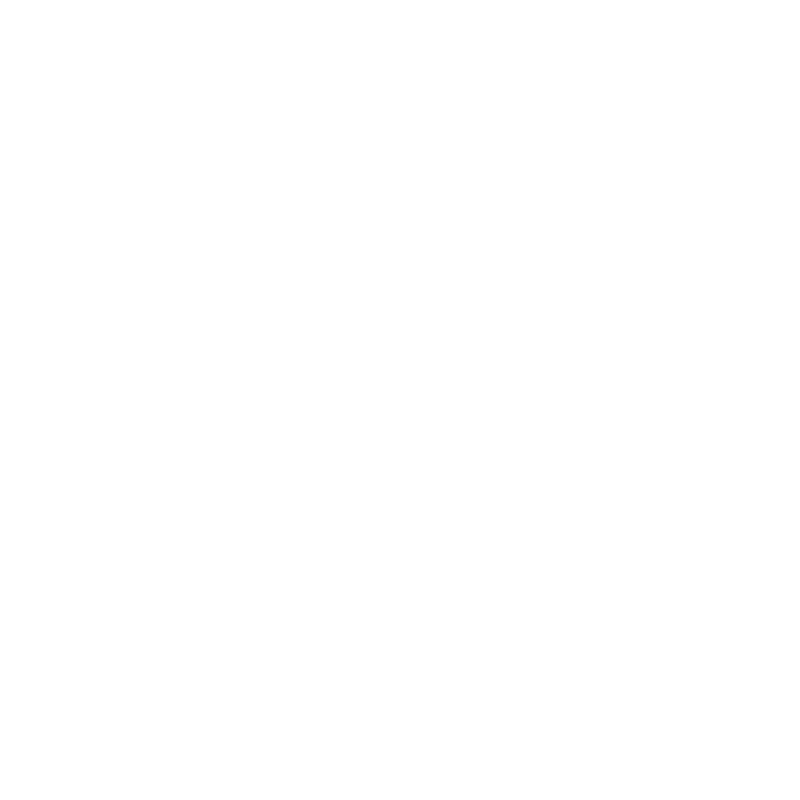

NameError: name 'json_file' is not defined

In [339]:
m1 = -0.21348314606741572
b1 = 3001.3 - 2957.4*m1

m3 = -(1/4.913043478260869) 
b3 = 3001.3 - 6179*m3  

#m=1
#b=0
xaxis1 = np.linspace(roi1[0]*m1+b1, roi1[1]*m1+b1, roi1[1]-roi1[0])
xaxis3 = np.linspace(roi3[0]*m3+b3, roi3[1]*m3+b3, roi3[1]-roi3[0])


plt.figure(figsize=(8,8))
plt.suptitle('11 RIXS from {}'.format(json_file.split('/')[-1]), fontsize=12)

plt.subplot(211)
plt.title('Si111 crystals')
plt.imshow(RIXS_roi1_all_photons, label="Ka", aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[xaxis1[0], xaxis1[-1], Energy_eV[0], Energy_eV[-1]], vmin=0, vmax=100)
plt.gca().invert_xaxis()
plt.xlabel("Emission energy (pixel)")
plt.ylabel("Incident energy (eV)")
plt.colorbar()
plt.legend(loc="best")

plt.subplot(212)
plt.title('SiO2 (11-20) crystals')
plt.imshow(RIXS_roi3_all_photons, aspect = 'auto', cmap = "bwr", label="Kb", origin ="lower", \
           extent=[xaxis3[0], xaxis3[-1], Energy_eV[0],Energy_eV[-1]], vmin=0, vmax=100)
plt.gca().invert_xaxis()
plt.xlabel("Emission energy (eV)")
plt.ylabel("Incident energy (eV)")
plt.legend(loc="best")
plt.colorbar()

plt.tight_layout()
plt.show()

plt.savefig(savedir+'/RIXS_plane_avg_2')

In [165]:
1/((2876 - 2787) / 19)

0.21348314606741572

/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


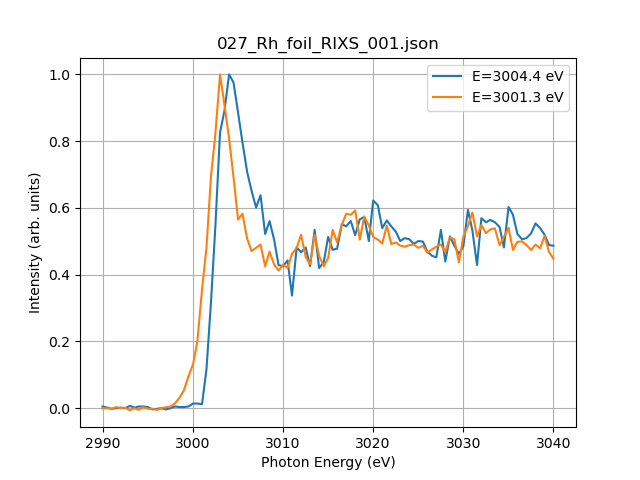

In [47]:
plt.figure()
plt.title(fc.selected_filename)
plt.plot(Energy_eV,np.mean(np.array(RIXS_roi3)[:,263:265],axis=1)/np.max(np.mean(np.array(RIXS_roi3)[:,263:265],axis=1)), label ='E=3004.4 eV' )
plt.plot(Energy_eV,np.array(RIXS_roi3)[:,279]/np.max(np.array(RIXS_roi3)[:,279]), label ='E=3001.3 eV')
plt.legend(loc='best')
plt.xlabel('Photon Energy (eV)')
plt.ylabel('Intensity (arb. units)')

plt.grid()
plt.show()

plt.savefig(savedir+'/Lb215_vs_Vtc')

/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


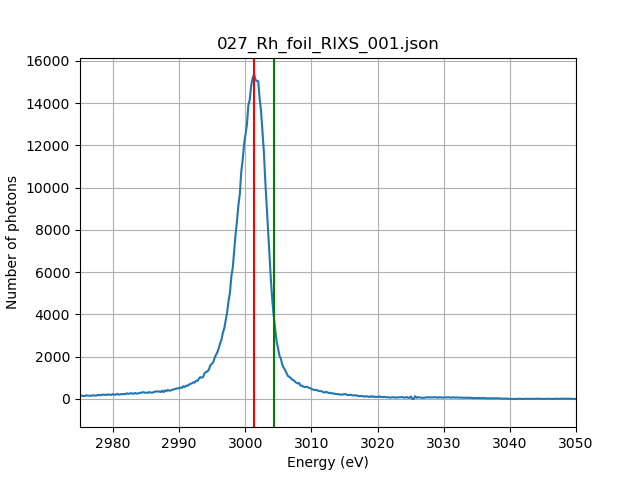

In [338]:
plt.figure()
plt.title(fc.selected_filename)
plt.plot(xaxis1, np.sum(np.array(RIXS_roi1)[-20:,:], axis =0))
plt.grid()
plt.xlim(2975, 3050)
plt.axvline(3001.3, color = 'r')
plt.axvline(3004.4, color = 'g')
plt.ylabel('Number of photons')
plt.xlabel('Energy (eV)')

plt.show()
#plt.savefig(savedir+'/Lb_VtC_integrated_Si111')

/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


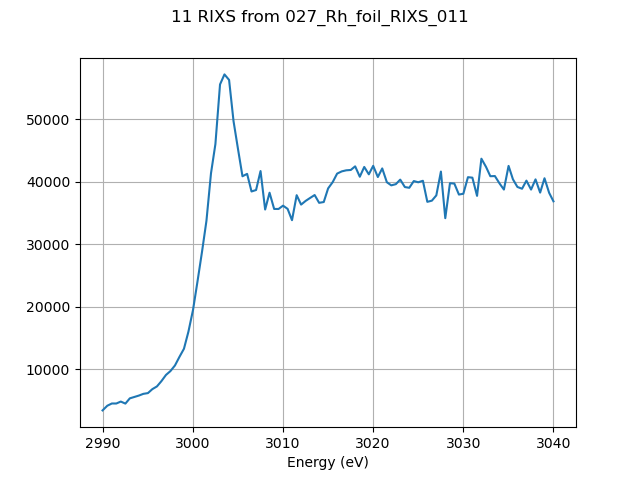

In [296]:
plt.figure()
plt.suptitle('11 RIXS from {}'.format(json_file.split('/')[-1]), fontsize=12)
plt.plot(Energy_eV, np.mean(XAS_roi3_all, axis=0))
plt.grid()
plt.xlabel('Energy (eV)')
plt.show()
plt.savefig(savedir+'/XANES_VonHamos.png')

## Next cells for an energy, any channel (BSDATA & JF) 

In [12]:
fc = FileChooser('/sf/alvra/data/p18442/res/scan_info')
fc.use_dir_icons = True
display(fc)

FileChooser(path='/sf/alvra/data/p18442/res/scan_info', filename='', show_hidden='False')

In [13]:
channel_list = [channel_PIPS_fluo, 'JF02T09V02']

roi1 = (5000, 5150, 220, 290) # Ru La ROIs
roi2 = (5000, 5150, 290, 360) 

roi3 = (2000, 2200, 10, 210)   # Lb _not set correctly!
roi4 = (2000, 2200, 230, 430)   # Kb_background


threshold_low = 2

####################################################################################################3
clock = Clock()
from sfdata import SFScanInfo
scan = SFScanInfo(fc.selected)
Energy_eV = scan.readbacks

XAS_roi1 = []
XAS_roi3 = []
calibration = []
RIXS_roi1 = []
RIXS_roi3 = []

for i, step in enumerate(scan):
    check_files_and_data(step)
    clear_output(wait=True)
    filename = scan.files[i][0].split('/')[-1].split('.')[0]
    print ('Step {} of {}: Processing {}'.format(i+1, len(scan.files), filename))
    
    spectrum_roi1 = 0
    spectrum_roi2 = 0
    spectrum_roi3 = 0
    spectrum_roi4 = 0
    
    results = load_data_compact(channel_list, step)
    
    Data_fluo = results[channel_PIPS_fluo]
    images = results['JF02T09V02']
    
    images_roi1 = crop_roi(images, roi1)
    images_roi2 = crop_roi(images, roi2)
    images_roi3 = crop_roi(images, roi3)
    images_roi4 = crop_roi(images, roi4)
    
    images_roi1_thr = images_roi1.copy()
    images_roi1_thr[images_roi1 < threshold_low] = 0
    #images_roi1_thr[images_roi1 > threshold_high] = 0
    
    images_roi2_thr = images_roi2.copy()
    images_roi2_thr[images_roi2 < threshold_low] = 0
    #images_roi2_thr[images_roi2 > threshold_high] = 0
    
    images_roi3_thr = images_roi3.copy()
    images_roi3_thr[images_roi3 < threshold_low] = 0
    #images_roi3_thr[images_roi3 > threshold_high] = 0
    
    images_roi4_thr = images_roi4.copy()
    images_roi4_thr[images_roi4 < threshold_low] = 0
    #images_roi4_thr[images_roi4 > threshold_high] = 0
    
    spectrum_roi1  = images_roi1_thr.sum(axis = 1).sum(axis = 0)
    spectrum_roi2  = images_roi2_thr.sum(axis = 1).sum(axis = 0)
    spectrum_roi3  = images_roi3_thr.sum(axis = 1).sum(axis = 0)
    spectrum_roi4  = images_roi4_thr.sum(axis = 1).sum(axis = 0)
    
    XAS_roi1.append(np.abs((spectrum_roi1 - spectrum_roi2).sum()))
    XAS_roi3.append(np.abs((spectrum_roi3 - spectrum_roi4).sum()))
    #print (np.argmax(spectrum_roi3 - spectrum_roi4))
    calibration.append(np.argmax(spectrum_roi1 - spectrum_roi2))

    RIXS_roi1.append(spectrum_roi1 - spectrum_roi2)
    RIXS_roi3.append(spectrum_roi3 - spectrum_roi4)
    
    print ("It took", clock.tick(), "seconds to process this file")
    
XAS_roi1 = np.array(XAS_roi1)
XAS_roi3 = np.array(XAS_roi3)

calibration = np.array(calibration)
RIXS_roi1 = np.array(RIXS_roi1)
RIXS_roi3 = np.array(RIXS_roi3)

print ("\nJob done! It took", clock.tock(), "seconds to process all the files")

Step 41 of 41: Processing run_000952

--------------------------------------------------------------------------------

JF02T09V02               2500 / 4999 -> 50% loss ▇▇▇▇▇
SAR-CVME-TIFALL5:EvtSet  4999 / 4999 ->  0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH2_VAL_GET 4999 / 4999 ->  0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 2500 / 4999 -> 50% loss
complete channels: 2 / 3 -> 33% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
It took 55.7 seconds to process this file

Job done! It took 2280.56 seconds to process all the files


<IPython.core.display.Javascript object>


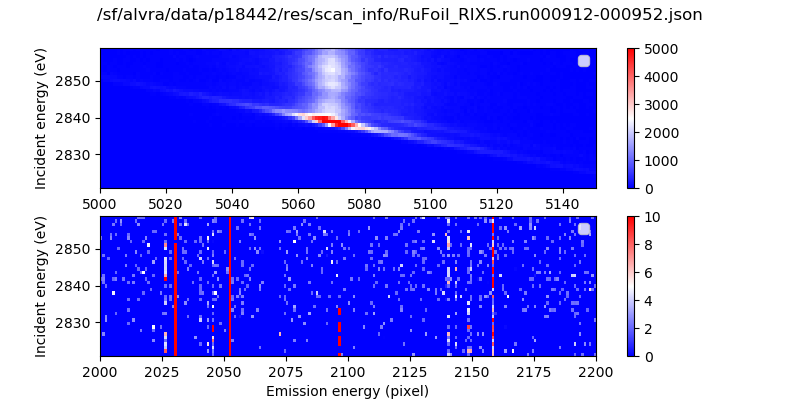

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [14]:
plt.figure(figsize=(8,4))
plt.suptitle(fc.selected, fontsize=12)
plt.subplot(211)
plt.imshow(RIXS_roi1, label="Ka", aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi1[0], roi1[1], Energy_eV[0], Energy_eV[-1]], vmin=0, vmax=5000)
plt.xlabel("Emission energy (pixel)")
plt.ylabel("Incident energy (eV)")
plt.colorbar()
plt.legend(loc="best")

plt.subplot(212)
plt.imshow(RIXS_roi3, aspect = 'auto', cmap = "bwr", label="Kb", origin ="lower", \
           extent=[roi3[0], roi3[1], Energy_eV[0], Energy_eV[-1]], vmin=0, vmax=10)
plt.xlabel("Emission energy (pixel)")
plt.ylabel("Incident energy (eV)")
plt.legend(loc="best")
plt.colorbar()
plt.show()


<IPython.core.display.Javascript object>


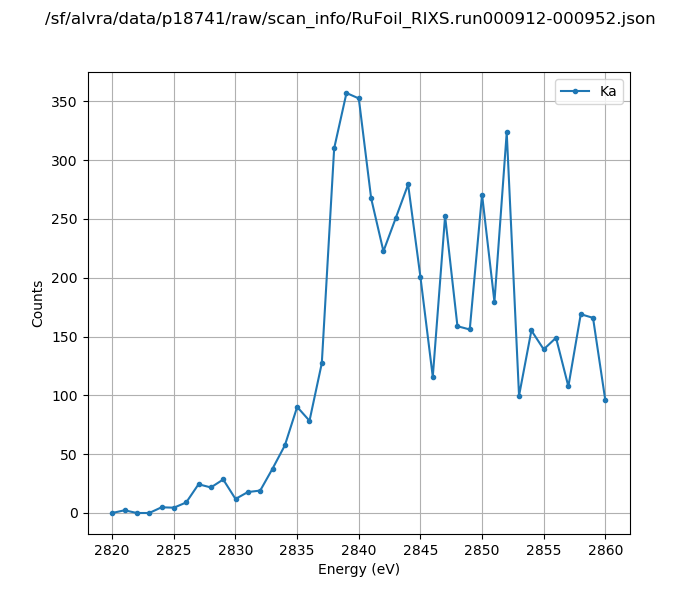

In [29]:
plt.figure(figsize=(7,6))
plt.suptitle(json_file, fontsize=12)

plt.plot(Energy_eV, XAS_roi1,label="Ka", marker='.')
plt.xlabel("Energy (eV)")
plt.ylabel("Counts")
plt.legend(loc="best")
plt.grid()

plt.show()

## Next cells for a single file, any channel (BSDATA & JF) 

In [ ]:
fc = FileChooser('/sf/alvra/data/p19262/raw/scan_info')
fc.use_dir_icons = True
display(fc)

In [ ]:
data = SFDataFiles('/sf/alvra/data/p18938/raw/XES_jet/run_008899*')

channel_list = [channel_PIPS_fluo, channel_Izero117, 'JF02T09V02']

roi1 = (7740, 7880, 290, 340) #signal 1
roi2 = (7740, 7880, 385, 435) #bkg 1

roi3 = (5080, 5220, 210, 250) #signal 2
roi4 = (5080, 5220, 145, 185) #bkg 2

threshold_low = 5

##########################################################
clock = Clock()
spectrum_roi1 = 0
spectrum_roi2 = 0
spectrum_roi3 = 0
spectrum_roi4 = 0
print (data.fnames[0])

results = load_data_compact_JF(channel_list, data, roi1, roi2, roi3, roi4)

data.close()

Data_fluo = results[channel_PIPS_fluo]
images_roi1 = results['JFroi1']
images_roi2 = results['JFroi2']
images_roi3 = results['JFroi3']
images_roi4 = results['JFroi4']

images_roi1_thr = images_roi1.copy()
images_roi1_thr[images_roi1 < threshold_low] = 0
#images_roi1_thr[images_roi1 > threshold_high] = 0

images_roi2_thr = images_roi2.copy()
images_roi2_thr[images_roi2 < threshold_low] = 0
#images_roi2_thr[images_roi2 > threshold_high] = 0

images_roi3_thr = images_roi3.copy()
images_roi3_thr[images_roi3 < threshold_low] = 0
#images_roi3_thr[images_roi3 > threshold_high] = 0

images_roi4_thr = images_roi4.copy()
images_roi4_thr[images_roi4 < threshold_low] = 0
#images_roi4_thr[images_roi4 > threshold_high] = 0

spectrum_roi1 = images_roi1_thr.sum(axis = 1).sum(axis = 0)
spectrum_roi2 = images_roi2_thr.sum(axis = 1).sum(axis = 0)
spectrum_roi3 = images_roi3_thr.sum(axis = 1).sum(axis = 0)
spectrum_roi4 = images_roi4_thr.sum(axis = 1).sum(axis = 0)

print ("It took", clock.tick(), "seconds to process this file")

In [ ]:
spectrum_bkg_roi1 = spectrum_roi1  - spectrum_roi2
err_spectrum_ro1 = np.sqrt(spectrum_roi1)
err_bkg_2 = np.sqrt(spectrum_roi2)

spectrum_bkg_roi3 = spectrum_roi3 - spectrum_roi4
err_spectrum_roi3 = np.sqrt(spectrum_roi3)
err_bkg_4 = np.sqrt(spectrum_roi4)


bin1_ = 1   # change the bin size if wanted, 1 is every pixel
bin3_ = 1

spectrum_bkg_1 = spectrum_bkg_roi1.copy()
spectrum_bkg_3 = spectrum_bkg_roi3.copy()
x_axis_1 = np.arange(roi1[0], roi1[1])
x_axis_3 = np.arange(roi3[0], roi3[1])


spectrum_rebin1  = bin_sum(spectrum_bkg_1,  bin1_)
x_axis_rebin1 = bin_mean(x_axis_1, bin1_)
spectrum_rebin3  = bin_sum(spectrum_bkg_3,  bin3_)
x_axis_rebin3 = bin_mean(x_axis_3, bin3_)


#low_err_Ka= (spectrum_rebin1)-np.sqrt(spectra_on_err1**2+spectra_off_err1**2)
#high_err_Kb= (spectra_on_rebin1 - spectra_off_rebin1)+np.sqrt(spectra_on_err1**2+spectra_off_err1**2)

#spectrumAllOutFoc=spectra_on_rebin1 + spectra_off_rebin1
plt.figure()
plt.subplot(211)
#plt.title(scan_name + ", delay = {} ps".format(str(np.round(Delay_ps_single,3))))
plt.plot(x_axis_rebin1, spectrum_rebin1, label="Ka", marker='.')
plt.legend(loc="best")
plt.grid()

plt.subplot(212)
#plt.title(scan_name + ", delay = {} ps".format(str(np.round(Delay_ps_single,3))))
plt.plot(x_axis_rebin3, spectrum_rebin3, label="Ka", marker='.')
plt.legend(loc="best")
plt.grid()

#plt.title(jf_file)
plt.xlabel("JF pixel")
plt.show()

In [ ]:
def edge_removal(module_edge, roi_removal, array):
    index_edge = module_edge - roi_removal[0]
    array_input = array.copy()
    print (array[index_edge-1:index_edge+3])
    array[index_edge] = array[index_edge-1]/2
    array[index_edge-1] = array[index_edge-1]/2

    array[index_edge+1] = array[index_edge+2]/2
    array[index_edge+2] = array[index_edge+2]/2 
    print (array[index_edge-1:index_edge+3])
    return array, array_input

In [ ]:
spectrum_ON_roi1, spectrum_ON_roi1_orig = edge_removal(6472, roi1, spectrum_ON_roi1) 
spectrum_OFF_roi1, spectrum_OFF_roi1_orig = edge_removal(6472, roi1, spectrum_OFF_roi1) 